## Credit Card Case Study

In [472]:
# imprort libraies
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [375]:
# Load the datasets
cust_data = pd.read_csv("C://Users//SANAM KANDAR//OneDrive//Desktop//Case Study//PYTHON//Python Foundation Case Study 2 - Credit Card Case Study//Case Study 2 - Credit Card Case Study//Customer Acqusition.csv")
repayment_data = pd.read_csv("C://Users//SANAM KANDAR//OneDrive//Desktop//Case Study//PYTHON//Python Foundation Case Study 2 - Credit Card Case Study//Case Study 2 - Credit Card Case Study//Repayment.csv")
spend_data = pd.read_csv("C://Users//SANAM KANDAR//OneDrive//Desktop//Case Study//PYTHON//Python Foundation Case Study 2 - Credit Card Case Study//Case Study 2 - Credit Card Case Study//spend.csv")

In [376]:
cust_data.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [377]:
spend_data.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [378]:
repayment_data.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


#### data cleaning for repayment_data

In [379]:
repayment_data.dropna(axis=1, how="all", inplace=True ) # drop missing values cols

In [380]:
repayment_data.dropna(axis=0, how="all", inplace=True) # drop missing values rows

In [381]:
repayment_data.columns = [i.replace(" ", "_") for i in repayment_data.columns]    # rename cols name which have " " space

In [382]:
repayment_data.columns = [i.replace(":", "") for i in repayment_data.columns]    

In [383]:
repayment_data

,SL_No,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77
1496,1497.0,A68,10-May-06,319836.49
1497,1498.0,A69,11-Jul-06,247628.45
1498,1499.0,A70,12-Aug-05,454016.51


In [384]:
repayment_data.Month = pd.to_datetime(repayment_data.Month, format="%d-%b-%y")        # month col into datetime type

In [385]:
repayment_data

,SL_No,Customer,Month,Amount
0,NaN,A1,2004-01-12,495414.75
1,2.0,A1,2004-01-03,245899.02
2,3.0,A1,2004-01-15,259490.06
3,4.0,A1,2004-01-25,437555.12
4,5.0,A1,2005-01-17,165972.88
...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77
1496,1497.0,A68,2006-05-10,319836.49
1497,1498.0,A69,2006-07-11,247628.45
1498,1499.0,A70,2005-08-12,454016.51


In [386]:
repayment_data.SL_No[repayment_data.SL_No.isna()] = 1             # setting value to NaN

C:\Users\SANAM KANDAR\AppData\Local\Temp\ipykernel_19200\481992556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repayment_data.SL_No[repayment_data.SL_No.isna()] = 1             # setting value to NaN


In [387]:
repayment_data.SL_No = repayment_data.SL_No.astype("int64")           # datatype conversion

In [388]:
repayment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL_No     1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 58.6+ KB


#### data cleaning for spend data

### SPEND 

In [389]:
spend_data.columns = [i.replace(" ", "_") for i in spend_data.columns]   # rename cols name which have " " space

In [390]:
spend_data.columns = [i.replace(":", "") for i in spend_data.columns]

In [391]:
spend_data

,Sl_No,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [392]:
spend_data.Month = pd.to_datetime(spend_data.Month, format="%d-%b-%y")              # month col into datetime type

In [393]:
spend_data

,Sl_No,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73
1496,1497,A68,2006-03-25,BUS TICKET,204971.10
1497,1498,A69,2006-03-31,BUS TICKET,50449.44
1498,1499,A70,2006-03-23,BUS TICKET,80593.94


In [394]:
cust_data

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


###### 1. In the above dataset,
##### a. In case age is less than 18, replace it with mean of age values.

In [395]:
cust_data.loc[cust_data.Age<18, "Age"] = round(cust_data.Age.mean())

###### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [396]:
#join tables
credit_data = pd.merge(left=cust_data,
                        right=spend_data, 
                        how="inner",
                        on="Customer")


In [397]:
credit_data

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl_No,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,139018.26
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,284521.06
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,90184.22


In [398]:
credit_data.loc[credit_data.Amount>credit_data.Limit, "Amount"] = credit_data.Limit * 50/100

In [399]:
credit_data

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl_No,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00


##### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [400]:
# final joined data of 3 tables
CreditCard_360 = pd.merge(left= credit_data, right=repayment_data,
                             how="inner",
                             left_on="Sl_No", right_on="SL_No",
                             suffixes=("_spend", "_repay")) 

In [401]:
CreditCard_360

,No,Customer_spend,Age,City,Product,Limit,Company,Segment,Sl_No,Month_spend,Type,Amount_spend,SL_No,Customer_repay,Month_repay,Amount_repay
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,A1,2004-01-12,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,2,A1,2004-01-03,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,3,A1,2004-01-15,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,4,A1,2004-01-25,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,5,A1,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,98,A96,2004-01-25,310992.30
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,99,A97,2004-01-12,121874.90
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,100,A98,2004-01-03,337815.57
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,101,A99,2004-01-15,25682.73


In [402]:
CreditCard_360.loc[CreditCard_360.Amount_repay>CreditCard_360.Limit, "Amount_repay"] = CreditCard_360.Limit

In [403]:
CreditCard_360

,No,Customer_spend,Age,City,Product,Limit,Company,Segment,Sl_No,Month_spend,Type,Amount_spend,SL_No,Customer_repay,Month_repay,Amount_repay
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,A1,2004-01-12,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,2,A1,2004-01-03,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,3,A1,2004-01-15,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,4,A1,2004-01-25,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,5,A1,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,98,A96,2004-01-25,100000.00
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,99,A97,2004-01-12,10000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,100,A98,2004-01-03,10001.00
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,101,A99,2004-01-15,10002.00


#### 2. From the above dataset create the following summaries:
#### a. How many distinct customers exist?


In [404]:
pd.DataFrame(CreditCard_360.Customer_spend.unique())

,0
0,A1
1,A2
2,A3
3,A4
4,A5
...,...
95,A96
96,A97
97,A98
98,A99


#### b. How many distinct categories exist?


In [405]:
CreditCard_360.groupby(by=CreditCard_360.Product).Product.count()

Product
Gold        610
Platimum    570
Silver      320
Name: Product, dtype: int64

#### c. What is the average monthly spend by customers?


In [406]:
CreditCard_360["Monthof_Spend"] = CreditCard_360.Month_spend.dt.month_name() + "-" + CreditCard_360.Month_spend.dt.year.astype("str")

In [407]:
avg_monthly_spend = CreditCard_360.groupby(by=["Customer_spend", "Monthof_Spend"]).Amount_spend.mean().reset_index()

In [408]:
avg_monthly_spend

,Customer_spend,Monthof_Spend,Amount_spend
0,A1,April-2006,261649.250000
1,A1,August-2005,344372.100000
2,A1,February-2004,52208.650000
3,A1,February-2005,205992.450000
4,A1,January-2004,373274.006667
...,...,...,...
802,A95,January-2004,240401.500000
803,A96,January-2004,54729.660000
804,A97,January-2004,5000.000000
805,A98,January-2004,5000.500000


#### d. What is the average monthly repayment by customers?


In [409]:
CreditCard_360["Monthof_Repayment"] = CreditCard_360.Month_repay.dt.month_name() + "-" + CreditCard_360.Month_repay.dt.year.astype("str")

In [410]:
avg_monthly_repayment = CreditCard_360.groupby(by=["Customer_repay","Monthof_Repayment"]).Amount_repay.mean().reset_index()

In [411]:
avg_monthly_repayment

,Customer_repay,Monthof_Repayment,Amount_repay
0,A1,April-2006,254474.580000
1,A1,February-2004,117964.430000
2,A1,February-2005,165977.342500
3,A1,January-2004,373638.901667
4,A1,January-2005,165972.880000
...,...,...,...
793,A95,January-2004,369405.960000
794,A96,January-2004,100000.000000
795,A97,January-2004,10000.000000
796,A98,January-2004,10001.000000


#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
#### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [412]:
interest = 2.9/100


In [413]:
CreditCard_360.groupby(by="Monthof_Spend").Amount_spend.sum()

Monthof_Spend
April-2004         3489415.34
April-2005         4100065.73
April-2006        12665908.03
August-2005        3967808.19
August-2006        2994094.85
December-2005      1181824.00
December-2006      2101811.05
February-2004      3835951.84
February-2005     25928183.21
February-2006      6236117.45
January-2004      44279811.96
January-2005       5383606.78
January-2006       1908375.22
July-2005          1691243.28
July-2006          5294483.07
June-2005          8010511.98
June-2006          2183600.98
March-2004         1871913.27
March-2006        28583302.72
May-2004           2146577.36
May-2005          21647612.42
May-2006           8046846.48
November-2004      1114989.10
November-2005      7481048.89
November-2006      4039950.52
October-2005       1258311.90
October-2006       2410188.02
September-2004     2402109.69
September-2005     1531932.87
September-2006     1993489.03
Name: Amount_spend, dtype: float64

In [414]:
CreditCard_360.groupby(by="Monthof_Repayment").Amount_repay.sum()

Monthof_Repayment
April-2004         5268979.74
April-2005         3634903.56
April-2006        16247638.94
August-2005        5549411.88
August-2006        1938641.97
December-2005      2149428.61
December-2006      2413907.27
February-2004      3391537.65
February-2005     25491800.20
February-2006      7339728.53
January-2004      44792020.72
January-2005       4894040.25
January-2006       2453064.46
July-2005          1799339.14
July-2006          6295652.89
June-2005          3493885.53
June-2006          1985148.84
March-2004         2666519.22
March-2006        31591837.84
May-2004           3782759.91
May-2005          30818764.69
May-2006          14900517.86
November-2004      1788398.63
November-2005      7107487.13
November-2006      3930259.60
October-2005       1635219.22
October-2006       2447635.07
September-2004     1902816.41
September-2005      882719.54
September-2006     2388294.79
Name: Amount_repay, dtype: float64

In [415]:
Monthly_Profit = CreditCard_360.groupby(by="Monthof_Repayment").Amount_repay.sum() - CreditCard_360.groupby(by="Monthof_Spend").Amount_spend.sum()

In [416]:
## Monthly profit on 2.9 % intrest rate on profit

Monthly_Profit[Monthly_Profit>0]*interest

Monthof_Repayment
April-2004         51607.36760
April-2006        103870.19639
August-2005        45866.50701
December-2005      28060.53369
December-2006       9050.79038
February-2006      32004.72132
January-2004       14854.05404
January-2006       15795.98796
July-2005           3134.77994
July-2006          29033.92478
March-2004         23043.57255
March-2006         87247.51848
May-2004           47449.29395
May-2005          265963.41583
May-2006          198756.47002
November-2004      19528.87637
October-2005       10930.31228
October-2006        1085.96445
September-2006     11449.36704
dtype: float64

##### f. What are the top 5 product types?


In [417]:
CreditCard_360.groupby(by="Type").Amount_spend.sum().sort_values(ascending=False).head(5)

Type
PETRO           28597384.98
CAMERA          27690738.44
FOOD            20519243.60
AIR TICKET      20155847.12
TRAIN TICKET    19995825.72
Name: Amount_spend, dtype: float64

##### g. Which city is having maximum spend?


In [418]:
CreditCard_360.groupby(by="City").Amount_spend.sum().sort_values(ascending=False).head(1)

City
COCHIN    45963513.5
Name: Amount_spend, dtype: float64

##### h. Which age group is spending more money?


In [419]:
CreditCard_360.groupby(by="Age").Amount_spend.sum().sort_values(ascending=False)

Age
46    20240746.17
28    17365270.23
78    12329508.54
37     9992645.71
25     9749700.72
51     9670808.79
47     9157809.12
44     9002326.39
29     8231607.26
50     8082803.39
67     7840760.08
21     7662247.39
24     6948235.19
38     6876389.81
36     6491191.06
60     6346711.02
72     6051138.76
35     5980154.00
52     5656608.44
43     5252438.32
76     5142702.76
39     4891474.75
54     4458771.82
41     3650955.67
63     3528482.07
27     1859124.07
34     1781962.38
61     1559253.89
49     1506267.31
53     1353183.28
77     1346771.77
71     1007945.92
74     1002195.63
32      992781.50
70      932200.20
79      904520.69
59      902108.49
69      871636.85
26      803699.35
55      757179.90
56      382522.09
31      312714.37
62      240401.50
65      175659.72
57      169992.36
42      155015.50
19       70014.00
75       47380.56
66       30066.44
33       10000.00
58        5000.00
Name: Amount_spend, dtype: float64

##### i. Who are the top 10 customers in terms of repayment?

In [420]:
CreditCard_360.groupby(by="Customer_spend").Amount_repay.sum().sort_values(ascending=False).head(10)

Customer_spend
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount_repay, dtype: float64

##### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [421]:
CreditCard_360["Year_spend"] = CreditCard_360.Month_spend.dt.year

In [422]:
city_wise_spend =pd.pivot_table(data=CreditCard_360, index=["Product", "Year_spend"], columns="City", values="Amount_spend", 
               aggfunc="sum", fill_value=0)

city_wise_spend

City                   BANGALORE      BOMBAY     CALCUTTA     CHENNAI  \
Product  Year_spend                                                     
Gold     2004         9289878.54  6987853.53   7477140.98  1059618.50   
         2005        12892362.99  8983018.28  10303355.80  3740945.58   
         2006        12030611.09  7917144.31  11167532.77  2704288.62   
Platimum 2004         1112732.30   897264.94   2037690.30  3535652.38   
         2005          912284.97   711804.94   4434696.31  5053956.32   
         2006          685831.27   972130.01   3589606.66  5024923.40   
Silver   2004         1291852.58   532089.03    500006.00   282056.86   
         2005          830612.34   508988.54    440147.06   377184.49   
         2006         1415480.94  1092833.80   1157956.42   350009.50   

City                      COCHIN       DELHI       PATNA  TRIVANDRUM  
Product  Year_spend                                                   
Gold     2004         7315850.15  2806495.00  2072567.90  2415102.84  
         2005        12110613.03  1964845.27  3252615.77  1240375.85  
         2006        10499142.38  2957103.32  2276181.69  2735710.87  
Platimum 2004         3419904.07   283512.89  1113069.60  2161676.67  
         2005         4960921.71   494157.86  2883231.07  3601443.30  
         2006         4920592.29   176788.72  1256137.65  2147403.75  
Silver   2004          814229.62   768172.30   756684.10   209667.48  
         2005          652269.38   612311.21   950094.19   269912.99  
         2006         1269990.87   854899.97   700005.00   555862.12

<AxesSubplot:title={'center':'City-wise spend on each product on yearly basis'}, xlabel='Product,Year_spend'>

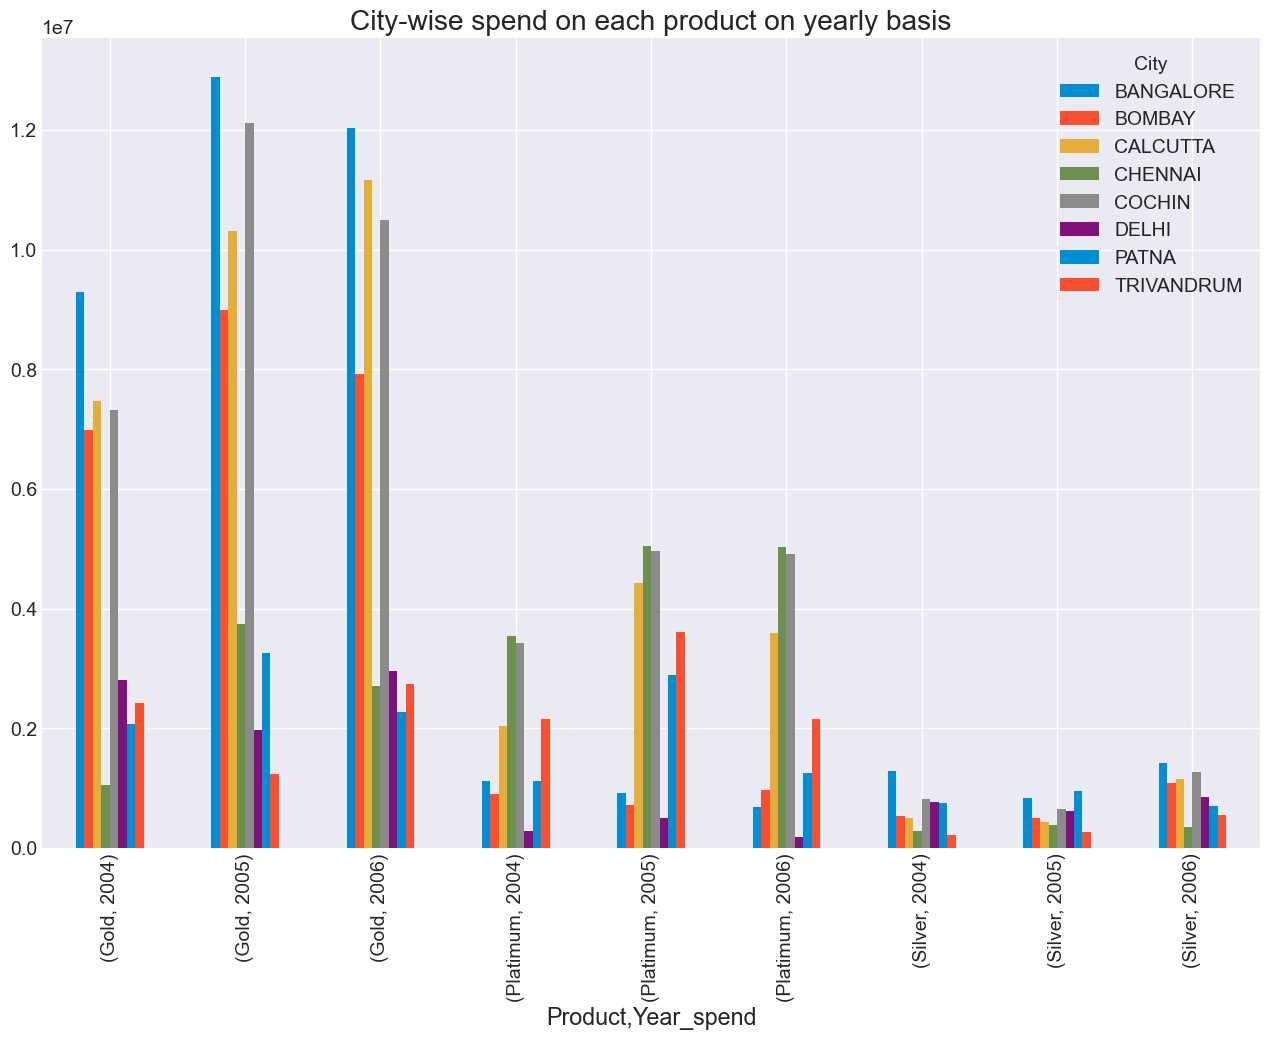

In [471]:
city_wise_spend.plot(kind=("bar"), figsize=(14,10),
         title="City-wise spend on each product on yearly basis",
         grid=True)

#### 4. Create graphs for
#### a. Monthly comparison of total spends, city wise









In [424]:
CreditCard_360.Monthof_Spend = pd.to_datetime(CreditCard_360.Monthof_Spend, format="%B-%Y")
CreditCard_360.Monthof_Repayment = pd.to_datetime(CreditCard_360.Monthof_Repayment, format="%B-%Y")

In [425]:
monthly_compare = pd.pivot_table(data=CreditCard_360, index="Monthof_Spend", columns="City", values="Amount_spend", 
               aggfunc="sum", 
               fill_value=0)

monthly_compare

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Monthof_Spend,,,,,,,,
2004-01-01,8662102.77,5350399.72,7920520.66,3962503.69,8762429.20,2564259.45,3525469.06,3532127.41
2004-02-01,535939.92,1016569.54,626394.70,0.00,384884.81,444497.23,50001.00,777664.64
2004-03-01,82428.80,507931.43,358822.88,427931.80,153175.37,291622.99,50000.00,0.00
2004-04-01,1405495.85,479946.78,55001.00,0.00,707487.06,310128.03,266851.54,264505.08
2004-05-01,783277.82,5000.50,239397.51,14664.26,806452.60,50001.50,50000.00,197783.17
2004-09-01,50000.00,484628.87,709699.03,472227.99,635552.80,50001.00,0.00,0.00
2004-11-01,175218.26,572730.66,105001.50,0.00,100002.00,147669.99,0.00,14366.69
2005-01-01,374694.07,598593.61,302528.95,499457.67,2438935.00,0.00,997187.90,172209.58
2005-02-01,5461325.81,2072631.17,6143069.67,3464890.80,3974781.89,974996.85,1817029.27,2019457.75


Text(0.5, 1.0, 'TRIVANDRUM')

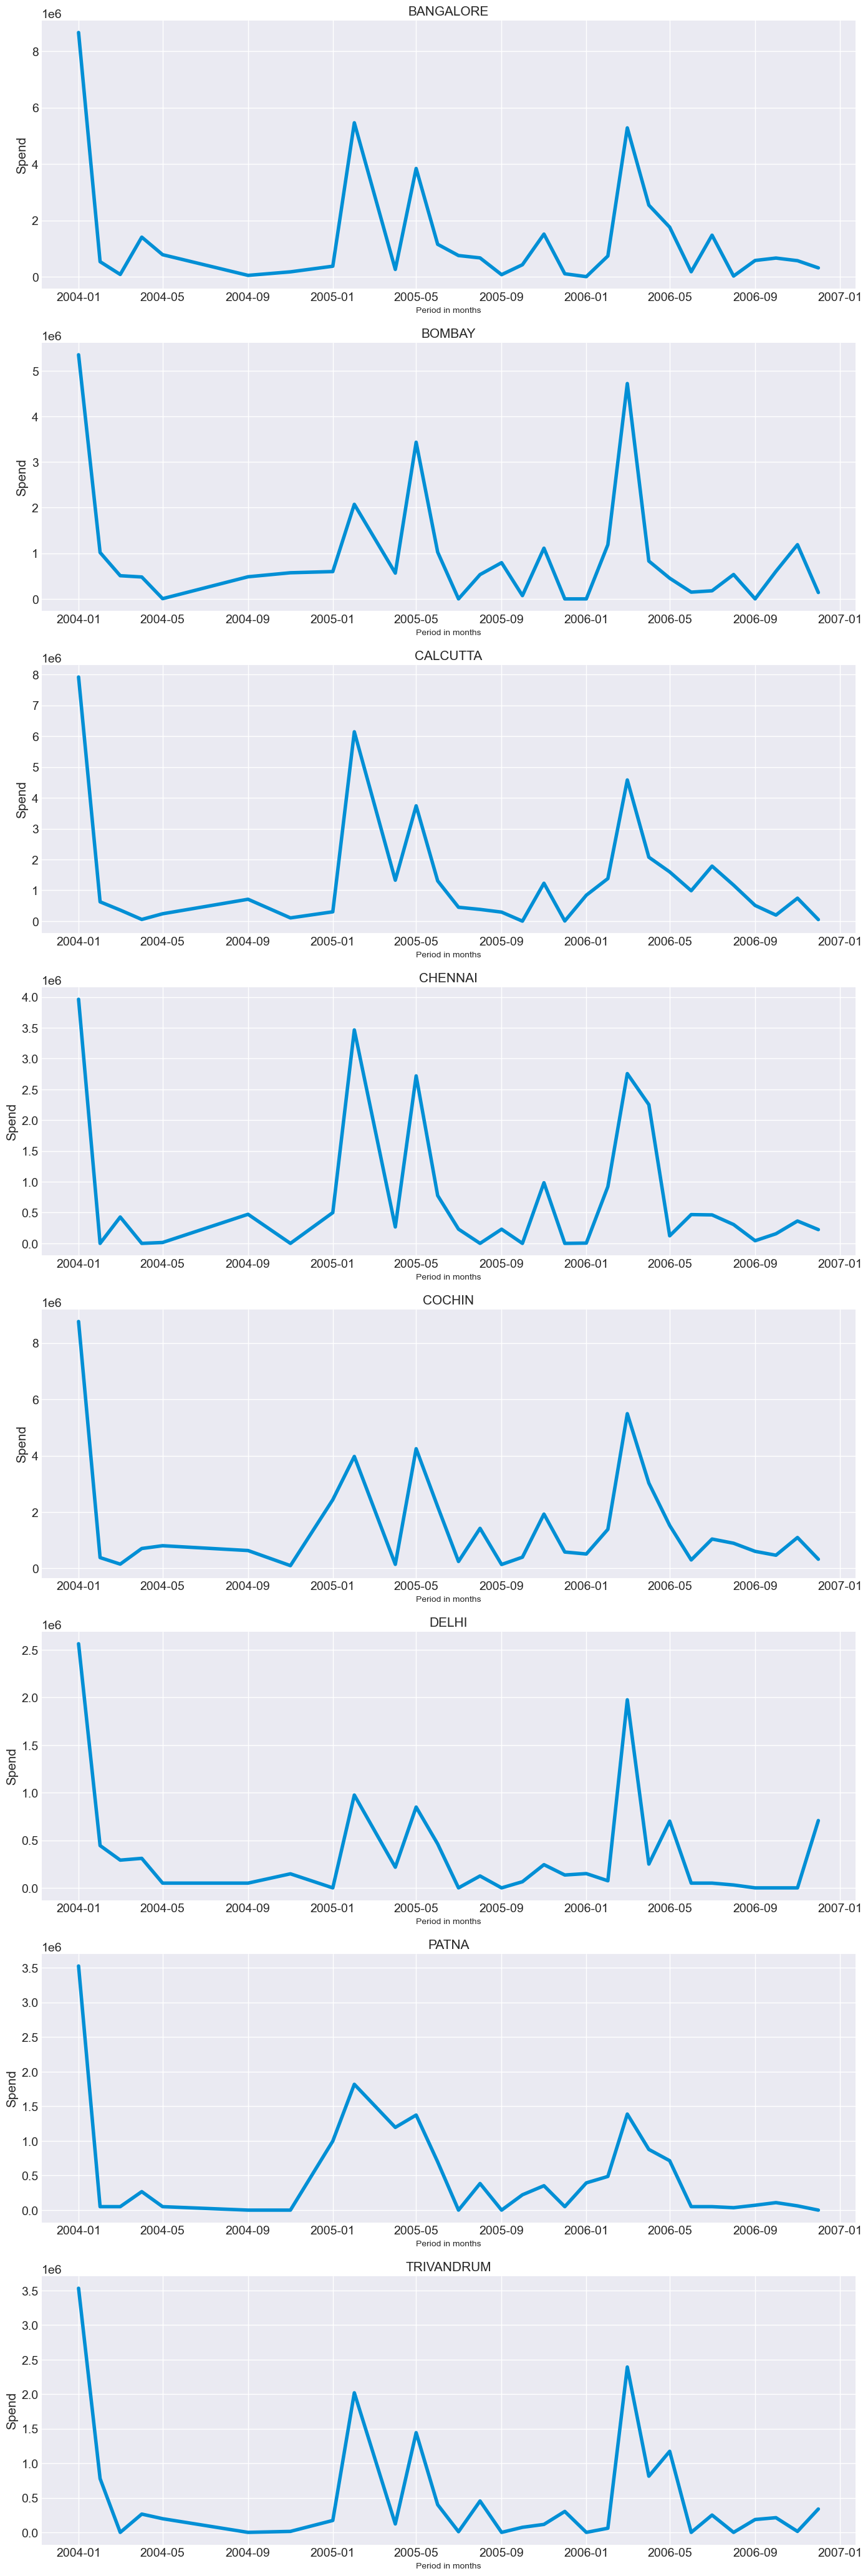

In [470]:
plt.style.use("seaborn-darkgrid") # background

fig, axe = plt.subplots(8,1,figsize=(15,50))

axe[0].plot(monthly_compare.BANGALORE)
axe[0].set_ylabel("Spend", fontsize=15)
axe[0].set_xlabel("Period in months", fontsize=10)
axe[0].set_title("BANGALORE", fontsize=15)

axe[1].plot(monthly_compare.BOMBAY)
axe[1].set_ylabel("Spend", fontsize=15)
axe[1].set_xlabel("Period in months", fontsize=10)
axe[1].set_title("BOMBAY", fontsize=15)

axe[2].plot(monthly_compare.CALCUTTA)
axe[2].set_ylabel("Spend", fontsize=15)
axe[2].set_xlabel("Period in months", fontsize=10)
axe[2].set_title("CALCUTTA", fontsize=15)

axe[3].plot(monthly_compare.CHENNAI)
axe[3].set_ylabel("Spend", fontsize=15)
axe[3].set_xlabel("Period in months", fontsize=10)
axe[3].set_title("CHENNAI", fontsize=15)

axe[4].plot(monthly_compare.COCHIN)
axe[4].set_ylabel("Spend", fontsize=15)
axe[4].set_xlabel("Period in months", fontsize=10)
axe[4].set_title("COCHIN", fontsize=15)

axe[5].plot(monthly_compare.DELHI)
axe[5].set_ylabel("Spend", fontsize=15)
axe[5].set_xlabel("Period in months", fontsize=10)
axe[5].set_title("DELHI", fontsize=15)

axe[6].plot(monthly_compare.PATNA)
axe[6].set_ylabel("Spend", fontsize=15)
axe[6].set_xlabel("Period in months", fontsize=10)
axe[6].set_title("PATNA", fontsize=15)

axe[7].plot(monthly_compare.TRIVANDRUM)
axe[7].set_ylabel("Spend", fontsize=15)
axe[7].set_xlabel("Period in months", fontsize=10)
axe[7].set_title("TRIVANDRUM", fontsize=15)            

#### b. Comparison of yearly spend on air tickets




In [427]:
AirTicket_spend =pd.pivot_table(data=CreditCard_360[CreditCard_360.Type=="AIR TICKET"],
               index="Year_spend", columns="Type", values="Amount_spend", aggfunc="sum")
AirTicket_spend

Type,AIR TICKET
Year_spend,
2004,4357225.35
2005,10550152.21
2006,5248469.56


<AxesSubplot:title={'center':'Comparison of yearly spend on air tickets'}, xlabel='Year_spend'>

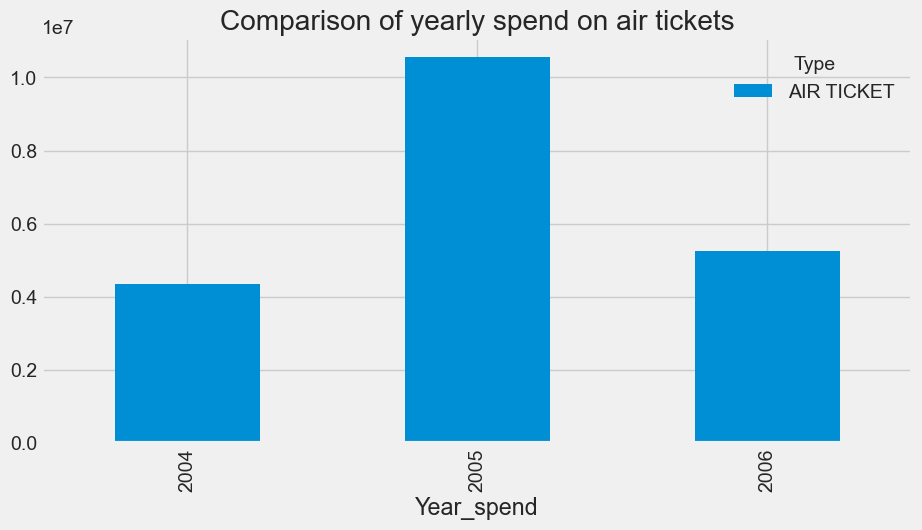

In [469]:
AirTicket_spend.plot(kind="bar", figsize=(10,5), title="Comparison of yearly spend on air tickets")

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


In [429]:
spend_prod = pd.pivot_table(data=CreditCard_360, index="Monthof_Spend", columns="Product", values="Amount_spend", 
               aggfunc="sum", 
               fill_value=0)


Text(0.5, 1.0, 'Silver')

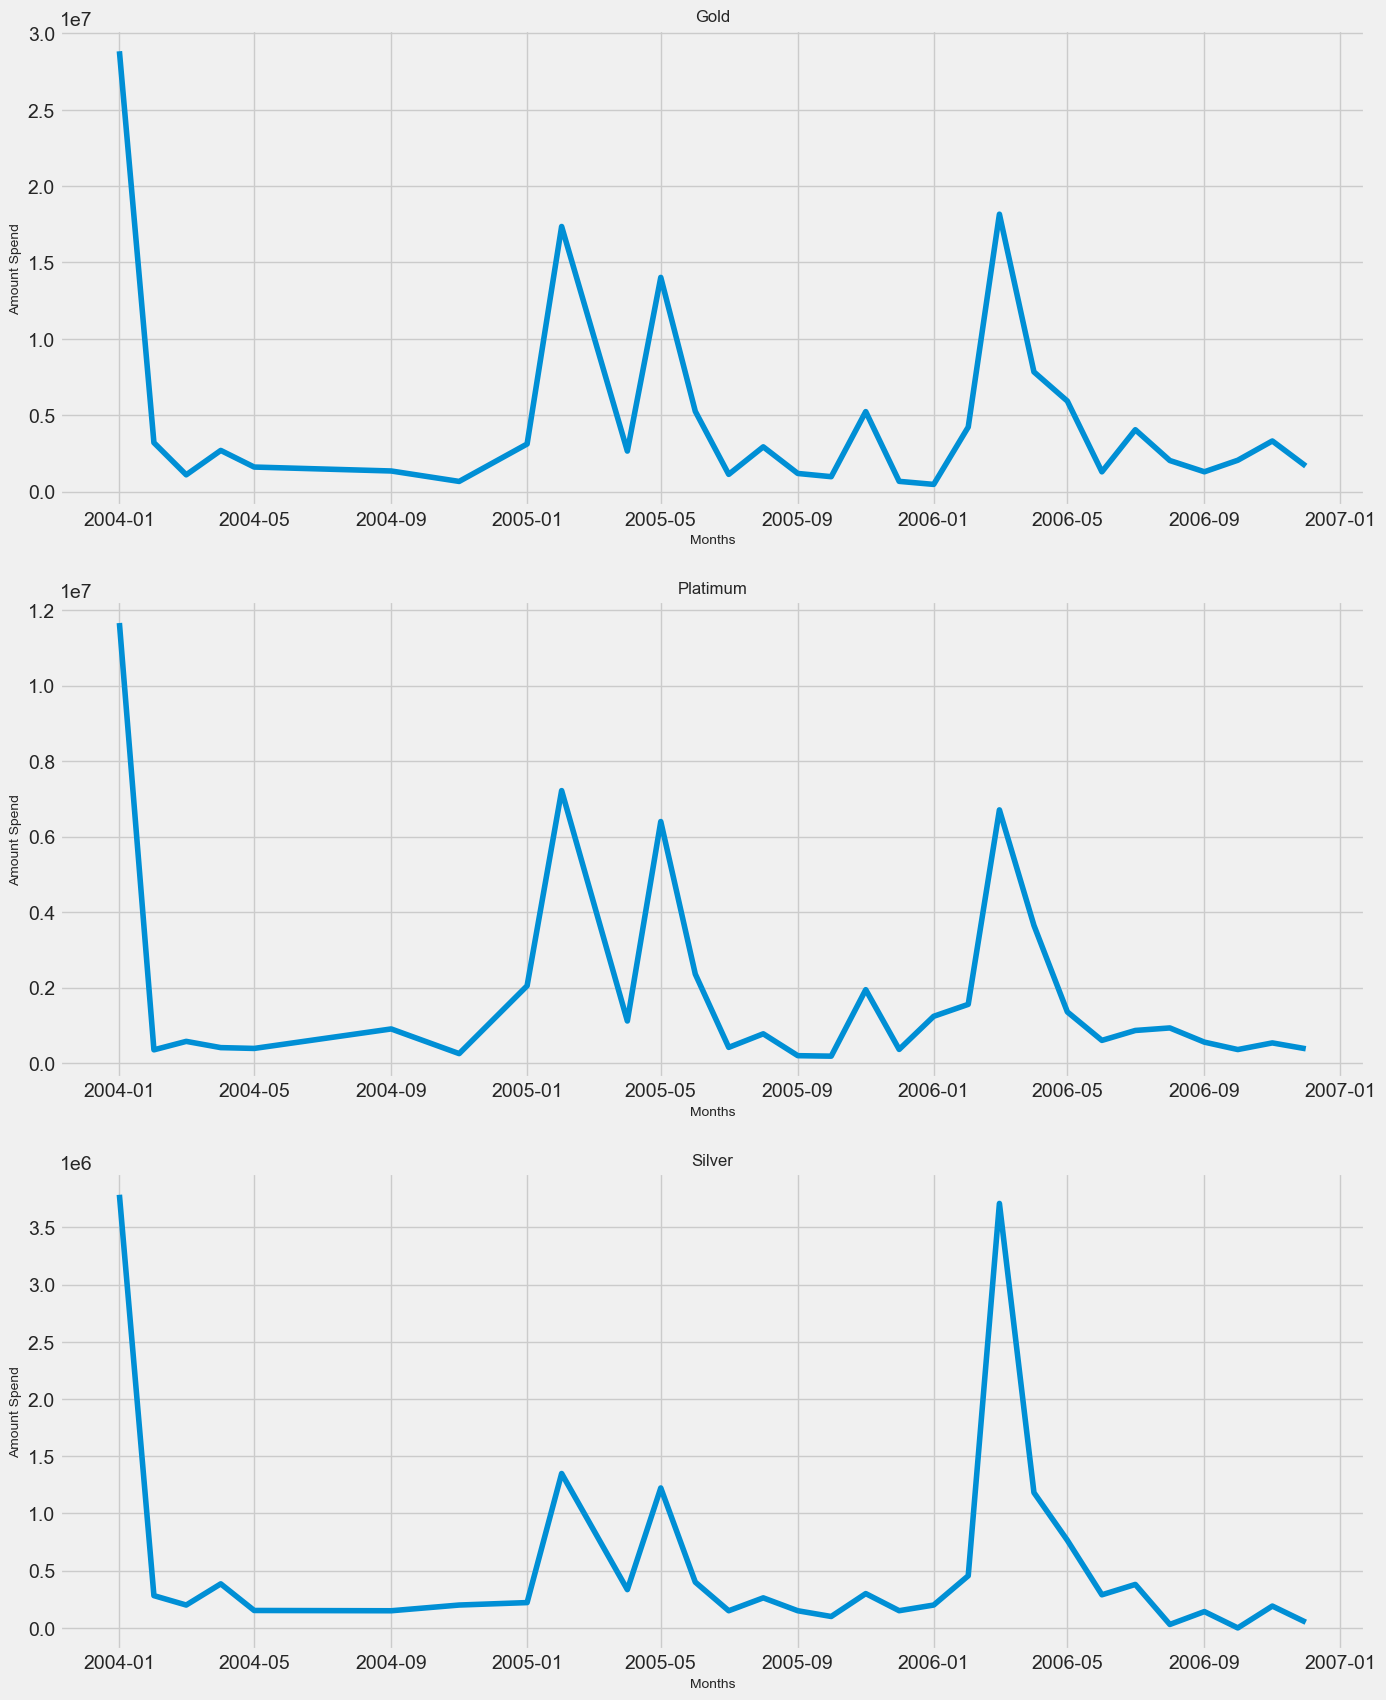

In [463]:
plt.style.use("fivethirtyeight")
fig, axe = plt.subplots(3,1, figsize=(15,20))

axe[0].plot(spend_prod.Gold)
axe[0].set_xlabel("Months", fontsize=10)
axe[0].set_ylabel("Amount Spend", fontsize=10)
axe[0].set_title("Gold", fontsize=12)

axe[1].plot(spend_prod.Platimum)
axe[1].set_xlabel("Months", fontsize=10)
axe[1].set_ylabel("Amount Spend", fontsize=10)
axe[1].set_title("Platimum", fontsize=12)

axe[2].plot(spend_prod.Silver)
axe[2].set_xlabel("Months", fontsize=10)
axe[2].set_ylabel("Amount Spend", fontsize=10)
axe[2].set_title("Silver", fontsize=12)


##### 5. Write user defined PYTHON function to perform the following analysis:
##### You need to find top 10 customers for each city in terms of their repayment amount by
##### different products and by different time periods i.e. year or month. The user should be able
##### to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
##### function should automatically take these inputs while identifying the top 10 customers.

In [431]:
CR_data = CreditCard_360[["Customer_spend","City", "Product", "Month_repay", "Amount_repay"]]

In [432]:
CR_data.rename(columns={"Customer_spend": "Customer"}, inplace=True) 

C:\Users\SANAM KANDAR\AppData\Local\Temp\ipykernel_19200\4013533595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CR_data.rename(columns={"Customer_spend": "Customer"}, inplace=True)


In [433]:
CR_data["Monthly"] = CR_data.Month_repay.dt.month_name()
CR_data["Yearly"] = CR_data.Month_repay.dt.year

C:\Users\SANAM KANDAR\AppData\Local\Temp\ipykernel_19200\378497166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CR_data["Monthly"] = CR_data.Month_repay.dt.month_name()
C:\Users\SANAM KANDAR\AppData\Local\Temp\ipykernel_19200\378497166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CR_data["Yearly"] = CR_data.Month_repay.dt.year


In [434]:
CR_data

,Customer,City,Product,Month_repay,Amount_repay,Monthly,Yearly
0,A1,BANGALORE,Gold,2004-01-12,495414.75,January,2004
1,A1,BANGALORE,Gold,2004-01-03,245899.02,January,2004
2,A1,BANGALORE,Gold,2004-01-15,259490.06,January,2004
3,A1,BANGALORE,Gold,2004-01-25,437555.12,January,2004
4,A1,BANGALORE,Gold,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...
1495,A96,CHENNAI,Silver,2004-01-25,100000.00,January,2004
1496,A97,TRIVANDRUM,Platimum,2004-01-12,10000.00,January,2004
1497,A98,CALCUTTA,Platimum,2004-01-03,10001.00,January,2004
1498,A99,CALCUTTA,Platimum,2004-01-15,10002.00,January,2004


In [435]:
def top10_customers():
    try:
        Product_cat = input("product (Gold/Silver/Platinum) : ").capitalize()
        Time_period = input("time_period (Monthly/Yearly) : ").capitalize()

        product_data = CR_data.loc[(CR_data["Product"]==Product_cat)]  #filtered data as per product

        cross_tab    = product_data.groupby(by=["Product","City", "Customer", Time_period]).Amount_repay.sum().reset_index()

        top10_data   = cross_tab.groupby(['City']).apply(lambda x: x.nlargest(10,'Amount_repay')).reset_index(drop=True)  

        return top10_data
    
    except Exception as e:
        print(f"\n\n\t Inavild input ! {e}.")

